In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

C:\Users\cm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
iris = load_iris()

In [33]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
iris.data.shape

(150, 4)

In [35]:
iris.target.shape

(150,)

In [85]:
np.unique(iris.target)

array([0, 1, 2])

In [49]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [50]:
data.shape

(150, 4)

In [53]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
tsne = TSNE(n_components=2)
df_trans = tsne.fit_transform(data)

In [72]:
df_trans.shape

(150, 2)

In [130]:
data_trans = pd.DataFrame(np.hstack((df_trans, iris.target.reshape(-1,1))), columns=['x','y','category'])

In [131]:
data_trans.shape

(150, 3)

In [132]:
data_trans.head()

,x,y,category
0,-22.406197,10.156743,0.0
1,-20.005274,9.633954,0.0
2,-19.642643,10.316407,0.0
3,-19.413977,10.521431,0.0
4,-22.438202,10.598161,0.0


In [133]:
data_trans['category'].value_counts()

2.0    50
1.0    50
0.0    50
Name: category, dtype: int64

In [134]:
d = dict(zip([0,1,2], list(iris.target_names)))
data_trans['category_name'] = data_trans['category'].replace(d)

In [135]:
data_trans.head()

,x,y,category,category_name
0,-22.406197,10.156743,0.0,setosa
1,-20.005274,9.633954,0.0,setosa
2,-19.642643,10.316407,0.0,setosa
3,-19.413977,10.521431,0.0,setosa
4,-22.438202,10.598161,0.0,setosa


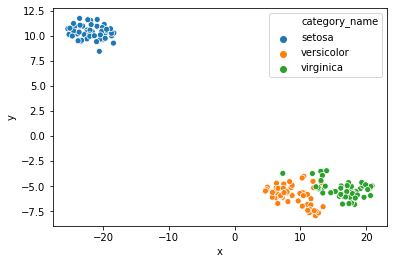

In [136]:
sns.scatterplot(data=data_trans, x='x',y='y', hue='category_name')